In [4]:
import pickle
mask_path = "/mnt/fasttalk/flame_model/assets/FLAME_masks.pkl"

try:
    with open(mask_path, "rb") as f:
        masks = pickle.load(f)
except UnicodeDecodeError:
    with open(mask_path, "rb") as f:
        masks = pickle.load(f, encoding="latin1")

print(type(masks))
if isinstance(masks, dict):
    print("keys:", list(masks.keys()))
    for k in list(masks.keys())[:5]:
        v = masks[k]
        if hasattr(v, "shape"):
            print(k, type(v), getattr(v, "shape", None))
        else:
            print(k, type(v), "len:", len(v) if hasattr(v, "__len__") else "n/a")
else:
    print("len:", len(masks) if hasattr(masks, "__len__") else "n/a")

<class 'dict'>
keys: ['eye_region', 'neck', 'left_eyeball', 'right_eyeball', 'right_ear', 'right_eye_region', 'forehead', 'lips', 'nose', 'scalp', 'boundary', 'face', 'left_ear', 'left_eye_region']
eye_region <class 'numpy.ndarray'> (751,)
neck <class 'numpy.ndarray'> (253,)
left_eyeball <class 'numpy.ndarray'> (546,)
right_eyeball <class 'numpy.ndarray'> (546,)
right_ear <class 'numpy.ndarray'> (588,)


In [5]:
masks['lips']

array([1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1590, 1590, 1591,
       1593, 1593, 1657, 1658, 1661, 1662, 1663, 1667, 1668, 1669, 1670,
       1686, 1687, 1691, 1693, 1694, 1695, 1696, 1697, 1700, 1702, 1703,
       1704, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718,
       1719, 1720, 1721, 1722, 1723, 1728, 1729, 1730, 1731, 1732, 1733,
       1734, 1735, 1736, 1737, 1738, 1740, 1743, 1748, 1749, 1750, 1751,
       1758, 1763, 1765, 1770, 1771, 1773, 1774, 1775, 1776, 1777, 1778,
       1779, 1780, 1781, 1782, 1787, 1788, 1789, 1791, 1792, 1793, 1794,
       1795, 1796, 1801, 1802, 1803, 1804, 1826, 1827, 1836, 1846, 1847,
       1848, 1849, 1850, 1865, 1866, 2712, 2713, 2714, 2715, 2716, 2717,
       2718, 2719, 2726, 2726, 2727, 2729, 2729, 2774, 2775, 2778, 2779,
       2780, 2784, 2785, 2786, 2787, 2803, 2804, 2808, 2810, 2811, 2812,
       2813, 2814, 2817, 2819, 2820, 2821, 2826, 2827, 2828, 2829, 2830,
       2831, 2832, 2833, 2834, 2835, 2836, 2837, 28

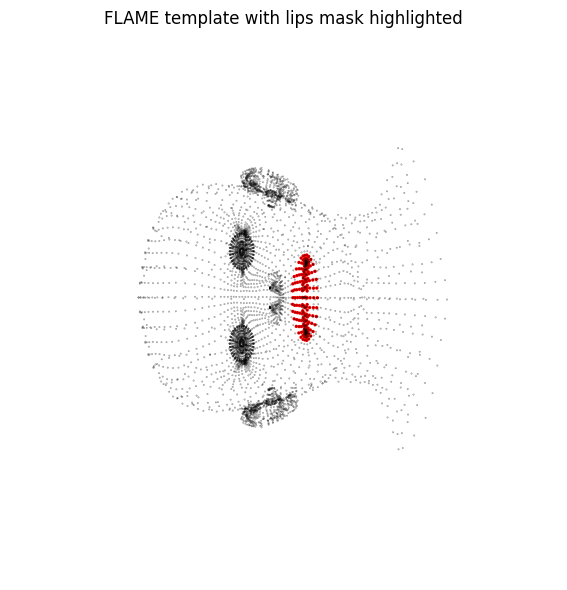

In [ ]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt

mesh_path = "/mnt/fasttalk/flame_model/assets/head_template_mesh_with_eye.obj"
mesh = trimesh.load(mesh_path, process=False)
verts = np.asarray(mesh.vertices)

lips_idx = masks["lips"]
lips_idx = np.asarray(lips_idx, dtype=np.int64)

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection="3d")

# Plot all vertices in light gray
ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2], s=0.1, c="black", alpha=0.5)

# Highlight lips vertices in red
ax.scatter(verts[lips_idx, 0], verts[lips_idx, 1], verts[lips_idx, 2], s=2.0, c="red", alpha=1.)

ax.set_title("FLAME template with lips mask highlighted")
ax.view_init(elev=90, azim=180)
ax.set_axis_off()
plt.tight_layout()
plt.show()